In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim

#%matplotlib inline

In [2]:
A =  np.array([[-0.0417188151856487, 0.0417188151856487, 0, 0],
               [19.5661243221110, -29.5661243221110, 0, 0],
               [0, 0, -0.206611570247934, 0.206611570247934],
               [0, 0, 0.760506418353262, -0.973272375800070]])

A1 = np.array([[0, 0, 0, 0,],
               [0, 0, 0, 0],
               [0, 0, 0, 0,],
               [4.54545454090909e-6, 0, 0, 0]])

B = np.array([[0],
              [.96078431372549e-6],
              [0],
              [0]])

C = np.array([[0.999999999, 0, 0, 0],
              [0, 0, 0.999999999, 0]])

D = np.array([[0],
              [0],
              [0],
              [0]])

F = np.array([[0, 1, 0, 0],
              [0, 0, 0, 1]])

G = np.zeros((2, 2), dtype=float)

H = np.array([[1.960749e-6],
              [0]])

N = np.array([[-29.5661, 0],
              [0, -0.9732]])

N1 = np.zeros((2, 2), dtype=float)

J = np.array([[19.5661, 0],
              [0, 0.7605]])

J1 = np.array([[0, 0],
               [4.5454e-6, 0]])


In [3]:
R = np.dot(G,C)
RA = np.dot(R,A)
RA1 = np.dot(R,A1);
RB = np.dot(R,B)
RD = np.dot(R,D)
NR = np.dot(N,R)
N1R = np.dot(N1,R)
JC = np.dot(J,C)
J1C = np.dot(J1,C)

In [4]:
t = np.arange(0,20, 0.001)
simLen = np.shape(t)[0]

In [5]:
tau = 1000

x = np.zeros((4, simLen))
xdot = np.zeros((4, simLen))
x[0,0:tau+1] = 1
x[1,0:tau+1] = 0.4
x[2,0:tau+1] = 2

zhat = np.zeros((2, simLen))
zhat[0,:tau+1] = 1
zhat[1,: tau+1] = 1.6
zhdot = np.zeros((2, simLen))
u = 5

In [6]:
for i in range(tau, simLen):
    xdot[:,i]= (np.dot(A, (x[:,i]).reshape(4,1)) + np.dot(A1, (x[:, i-tau]).reshape(4,1)) + B*u + D*(np.random.randint(5))).reshape(4,)
    if (i != simLen-1):
        x[:,i+1] = x[:,i] + 0.001*xdot[:,i]

In [7]:
y = np.dot(C,x)

In [8]:
for i in range(tau, simLen):
    zhdot[:,i] = (np.dot(N, (zhat[:,i]).reshape(2,1)) + np.dot(N1, (zhat[:,i-tau]).reshape(2,1)) + np.dot((JC + RA - NR), (x[:, i]).reshape(4,1)) + np.dot((J1C + RA1 - N1R), (x[:, i-tau]).reshape(4,1)) + (H + RB)*u + RD*(np.random.randint(5))).reshape(2,)
    if (i != simLen - 1):
        zhat[:,i+1] = zhat[:,i] + 0.001*zhdot[:,i]

In [9]:
z = np.dot(F, x)

In [10]:
err = abs(zhat - z)

In [11]:
fig1 = plt.figure(figsize=(7, 10))
fig1.text(0.5, 0.00, 'time (s)', ha='center', va='center')
fig1.text(0.5, 0.5, 'time (s)', ha='center', va='center')
fig1.text(0.00, 0.75, 'Voltage', ha='center', va='center', rotation='vertical')
fig1.text(0.00, 0.25, 'Magnitude', ha='center', va='center', rotation='vertical')


ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.set_title("Estimating $V_1(t)$")
ax2.set_title("Error Dynamics")

V1, = ax1.plot(t[:10000], z[0,:10000], "b-", linewidth = 1.6, label="$z_1(t)$")                 
V1hat, = ax1.plot(t[:10000], zhat[0,:10000], "r--", linewidth = 1.6, label="$\hat{z}_1(t)$")
V1.set_antialiased(True)
V1hat.set_antialiased(True)                 
ax1.legend(handles=[V1, V1hat], loc='upper right')

errline, = ax2.plot(t[0:10000], err[0, 0:10000],'g-', linewidth=1.6, label='$e(t)$')
errline.set_antialiased(True)
#plt.ylim(0, 1.0)
ax2.legend(handles=[errline], loc='upper right')          

In [12]:
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=4)

In [13]:
plt.savefig('filter_v1_simulation.eps', figsize=(7, 10), dpi=600, bbox_inches='tight')

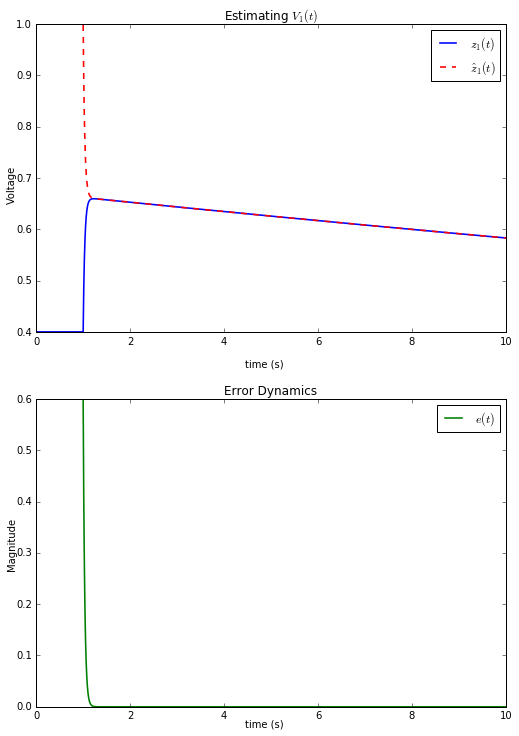

In [14]:
plt.show()

In [15]:
fig1 = plt.figure(figsize=(7, 10))
fig1.text(0.5, 0.00, 'time (s)', ha='center', va='center')
fig1.text(0.5, 0.5, 'time (s)', ha='center', va='center')
fig1.text(0.00, 0.75, 'Voltage', ha='center', va='center', rotation='vertical')
fig1.text(0.00, 0.25, 'Magnitude', ha='center', va='center', rotation='vertical')


ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.set_title("Estimating $V_2(t)$")
ax2.set_title("Error Dynamics")

V1, = ax1.plot(t[:10000], z[1,:10000], "b-", linewidth = 1.6, label="$z_2(t)$")                 
V1hat, = ax1.plot(t[:10000], zhat[1,:10000], "r--", linewidth = 1.6, label="$\hat{z}_2(t)$")
V1.set_antialiased(True)
V1hat.set_antialiased(True)                 
ax1.legend(handles=[V1, V1hat], loc='upper right')

errline, = ax2.plot(t[0:10000], err[1, 0:10000],'g-', linewidth=1.6, label='$e(t)$')
errline.set_antialiased(True)
#plt.ylim(0, 1.0)
ax2.legend(handles=[errline], loc='upper right')   

In [16]:
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=4)

In [17]:
plt.savefig('filter_v2_simulation.eps', figsize=(7, 10), dpi=600, bbox_inches='tight')

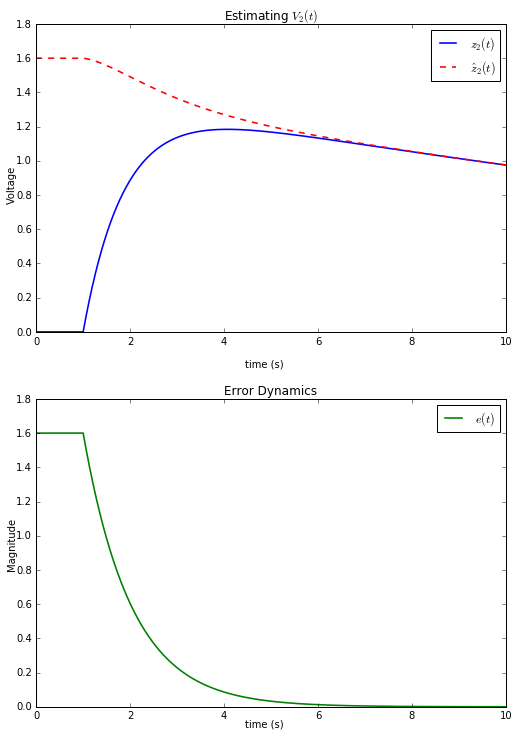

In [18]:
plt.show()